<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# %matplotlib inline - se precisar

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
#### A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

#### O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's)

#### Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
<ul style='font-size: 14px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [2]:
dados = pd.read_csv('dados/Consumo_cerveja.csv', sep = ';')

## Visualizar os dados

In [3]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Verificando o tamanho do dataset

In [4]:
# Linhas por colunas
dados.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação

<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [6]:
# Associação positiva: uma variável sobe e a outra sobe também
# Método Person é o default
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<AxesSubplot:title={'center':'Consumo de cerveja'}, xlabel='Dias do ano', ylabel='Litros'>

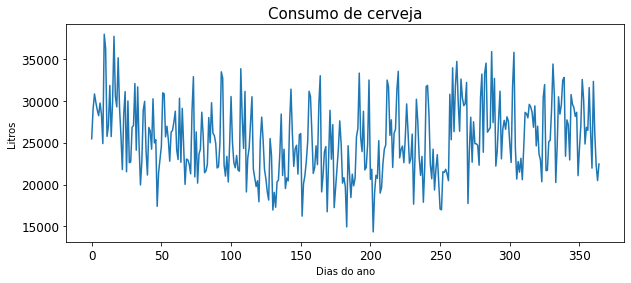

In [7]:
fig, ax = plt.subplots(figsize = (10,4))
ax.set_title('Consumo de cerveja', fontsize = 15)
ax.set_ylabel('Litros', fontsize = 10)
ax.set_xlabel('Dias do ano', fontsize = 10)
ax = dados.consumo.plot(fontsize = 12)
ax

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot:xlabel='Litros'>

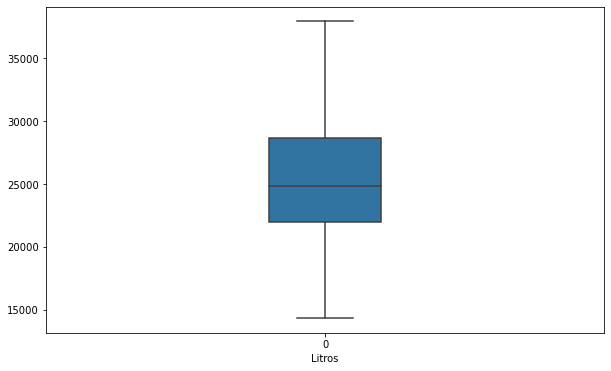

In [8]:
ax2 = sns.boxplot(data = dados.consumo, orient = 'v', width = 0.2)
ax2.figure.set_size_inches(10,6)
ax2.set_xlabel('Litros')
ax2

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

Text(0.5, 0, 'Final de semana')

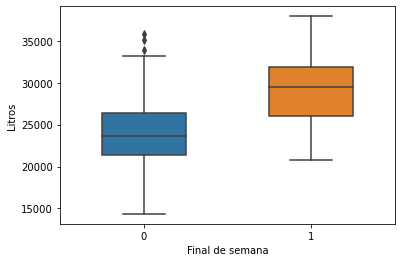

In [9]:
ax1 = sns.boxplot(y = 'consumo', x = 'fds',data = dados, width = 0.5)
ax1.set_ylabel('Litros')
ax1.set_xlabel('Final de semana')

## Distribuição de frequências da variável *dependente* (y)

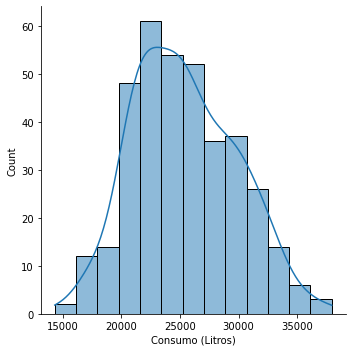

In [10]:
ax3 = sns.displot(dados.consumo, kde = True)
ax3.set_axis_labels('Consumo (Litros)')
ax3

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

# Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

### Plota o relacionamento entre pares de variáveis em um dataset

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot


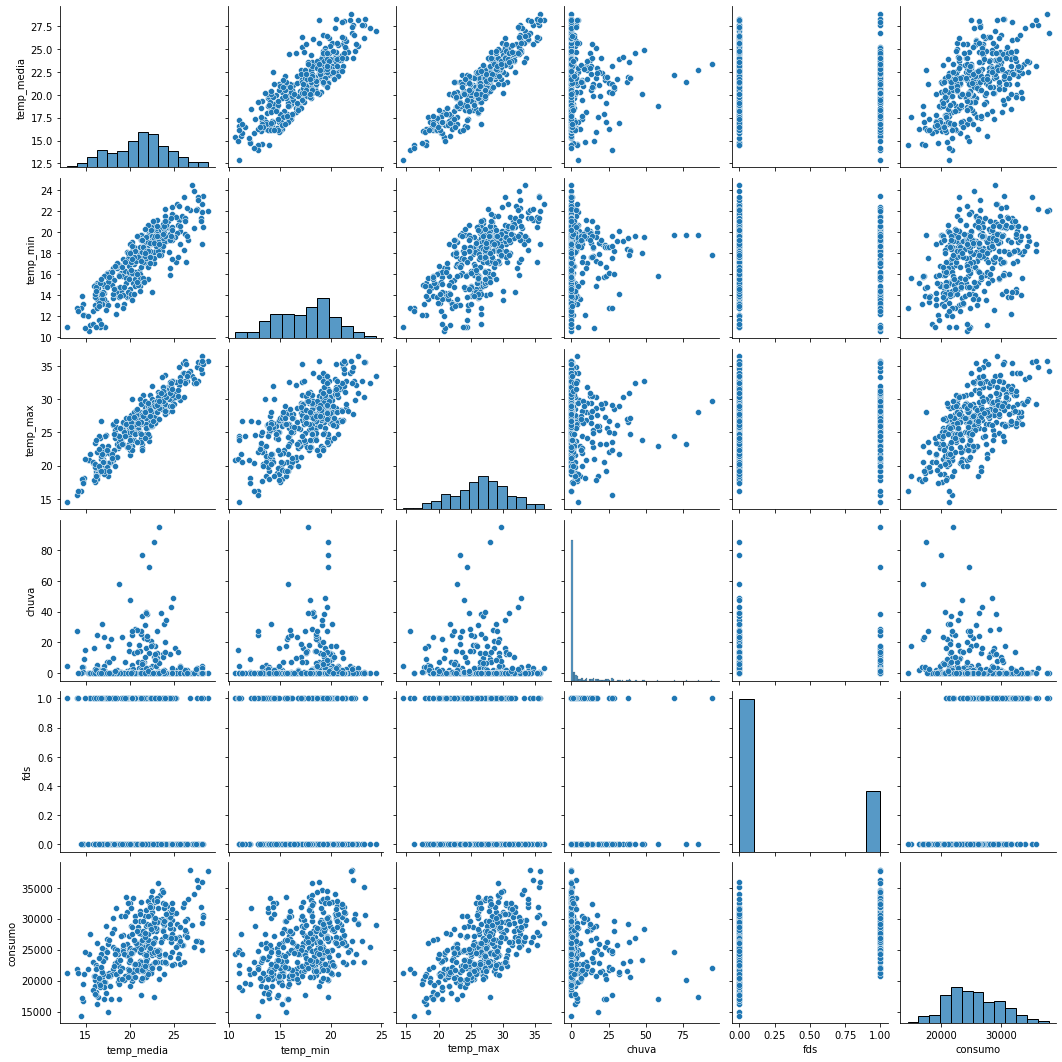

In [11]:
# Plotagem da relação de todas as variáveis
ax4 = sns.pairplot(dados)
ax4

## Plotando o pairplot fixando somente uma variável no eixo y

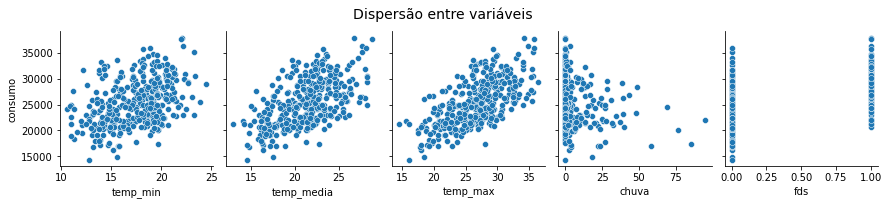

In [12]:
ax5 = sns.pairplot(dados, y_vars = 'consumo', x_vars = ['temp_min', 'temp_media', 'temp_max','chuva','fds'])
ax5.fig.suptitle('Dispersão entre variáveis', fontsize = 14, y = 1.1)
ax5

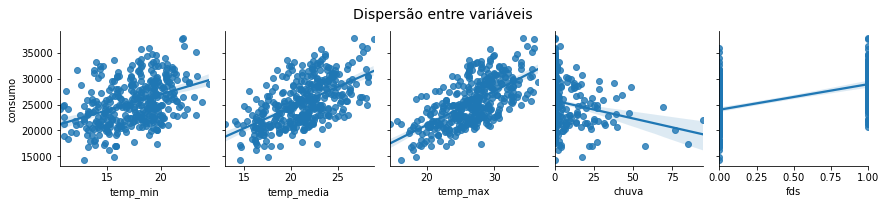

In [13]:
ax6 = sns.pairplot(dados, y_vars = 'consumo', x_vars = ['temp_min', 'temp_media', 'temp_max','chuva','fds'],kind = 'reg')
ax6.fig.suptitle('Dispersão entre variáveis', fontsize = 14, y = 1.1)
ax6

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

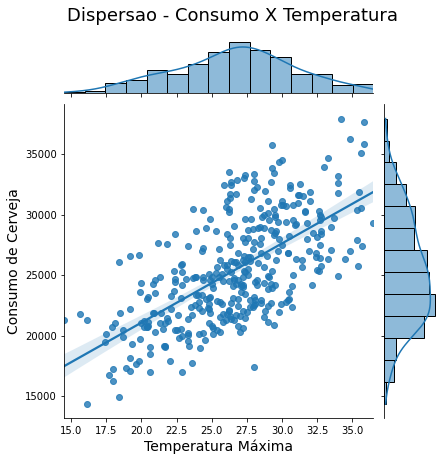

In [14]:
ax7 = sns.jointplot(x="temp_max", y="consumo", data=dados, kind = 'reg')
ax7.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax7.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax7

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

### Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot


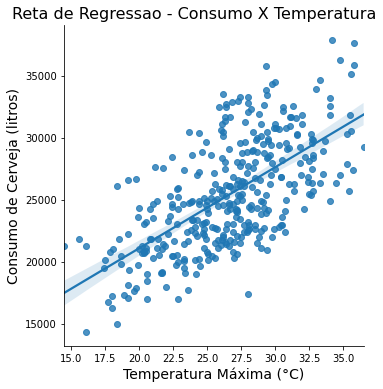

In [15]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

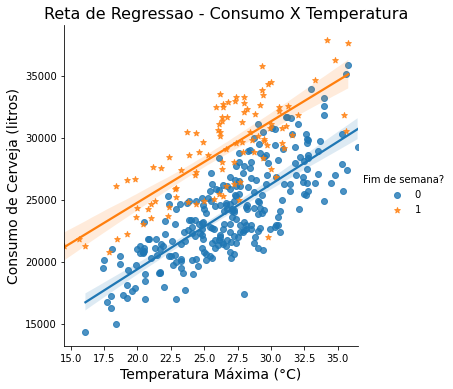

In [16]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, hue = 'fds', markers = ['o', '*'],legend = False)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title = 'Fim de semana?')
ax

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

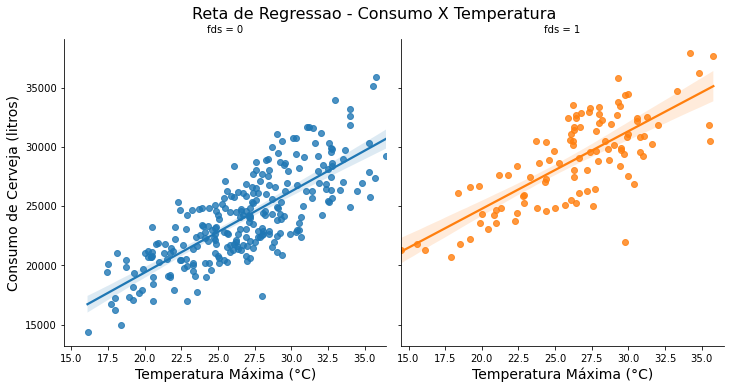

In [17]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, hue = 'fds',col = 'fds')
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

# Estimando um Modelo de Regressão Linear para o Consumo

# Regresão Linear

### A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

### O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*;

### scikit-learn (https://scikit-learn.org/stable/)




## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [18]:
y = dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [19]:
X = dados[['temp_max','chuva','fds']]

## Criando os datasets de treino e de teste

In [20]:
# Criação requer scikitlearn e pandas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [21]:
X_train.shape

(255, 3)

In [22]:
X_test.shape

(110, 3)

In [23]:
X_train.shape[0] + X_test.shape[0]

365

In [24]:
X.shape[0] * 0.3

109.5

In [25]:
X.shape[0] * 0.7

255.49999999999997

# REGRESSÃO LINEAR

## Instanciando a classe *LinearRegression()*

In [26]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (X_train e y_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [27]:
modelo.fit(X_train,y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [28]:
# Como verificar o score do modelo e seu coeficiente R2 do teste treino
print('R² = {}'.format(modelo.score(X_train,y_train).round(2)))

R² = 0.73


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [29]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [30]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [31]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [32]:
# Resposta: um dia de temperatura máxima de 30.5°c e chuva de 12.2mm terá o resultado de consumo
modelo.predict(entrada).round(2)[0]

26094.9

## Criando um simulador simples

In [33]:
temp_max = 30.5
chuva = 12.2
fds = 0 
entrada1 = [[temp_max,chuva,fds]]
print('{} litros'.format(modelo.predict(entrada1).round(2)))

[26094.9] litros


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

### >O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.

In [34]:
modelo.intercept_

5951.9763393124595

In [35]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

### Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.

In [36]:
# temperatura, chuva e fds
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [37]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [38]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [39]:
index = ['Intercepto', 'Temperatura Máxima','Chuva', 'Final de semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [40]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva,-60.782435
Final de semana,5401.083339


## Interpretação dos Coeficientes Estimados

### <b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

### <b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.

### <b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.

### <b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [41]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Text(0, 0.5, 'Consumo real em listros')

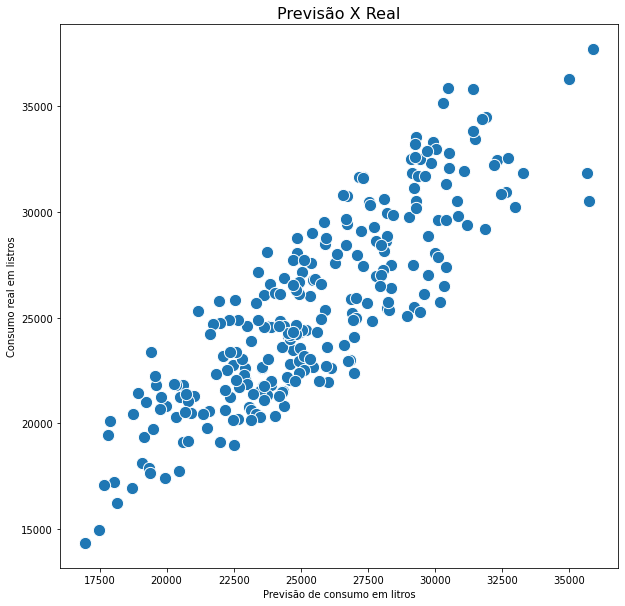

In [42]:
ax9 = sns.scatterplot(x = y_previsto_train, y = y_train , s=150)
ax9.figure.set_size_inches(10,10)
ax9.set_title('Previsão X Real',fontsize = 16)
ax9.set_xlabel('Previsão de consumo em litros')
ax9.set_ylabel('Consumo real em listros')

## Obtendo os resíduos

In [43]:
residuo = y_train - y_previsto_train
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

Text(0, 0.5, 'Resíduo')

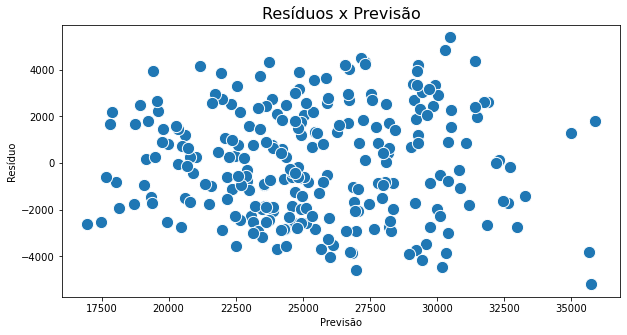

In [44]:
ax9 = sns.scatterplot(x = y_previsto_train, y = residuo , s=150)
ax9.figure.set_size_inches(10,5)
ax9.set_title('Resíduos x Previsão',fontsize = 16)
ax9.set_xlabel('Previsão')
ax9.set_ylabel('Resíduo')

## Utilizando os resíduos ao quadrado

<img width='800px' src='var_u.jpg'>

Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

Text(0, 0.5, 'Resíduo')

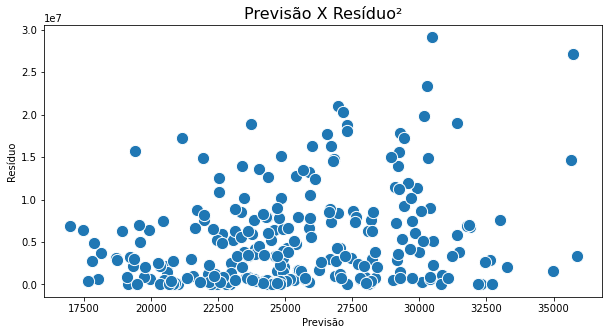

In [45]:
# A variância dos resíduos não é constante
ax9 = sns.scatterplot(x = y_previsto_train, y = residuo**2 , s=150)
ax9.figure.set_size_inches(10,5)
ax9.set_title('Previsão X Resíduo²',fontsize = 16)
ax9.set_xlabel('Previsão')
ax9.set_ylabel('Resíduo')

## Plotando a distribuição de frequências dos resíduos

Text(0, 0.5, 'Litros')

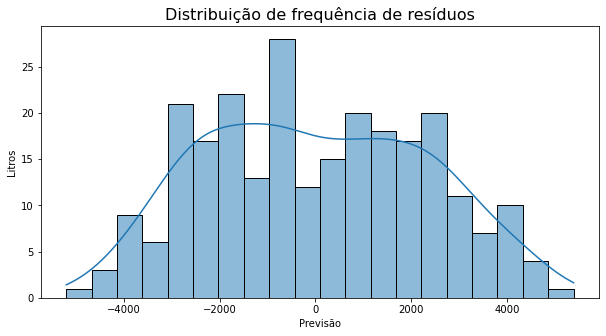

In [46]:
ax = sns.histplot(residuo, bins = 20, kde = True)
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de frequência de resíduos',fontsize = 16)
ax.set_xlabel('Previsão')
ax.set_ylabel('Litros')

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [47]:
X2 = dados[['temp_media','chuva','fds']]

## Criando os datasets de treino e de teste

In [48]:
# É o mesmo Y: dados.consumo
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.3, random_state = 2811 )

## Instanciando a classe *LinearRegression()*

In [49]:
modelo_2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [50]:
modelo_2.fit(X2_train,y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [51]:
print('Modelo com temperatura máxima')
print('R² = {}'.format(modelo.score(X_train,y_train).round(2)))

Modelo com temperatura máxima
R² = 0.73


In [52]:
print('Modelo com temperatura média')
print('R² = {}'.format(modelo_2.score(X2_train,y2_train).round(2)))

Modelo com temperatura média
R² = 0.66


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [53]:
y_previsto  = modelo.predict(X_test)
y_previsto2 = modelo_2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [54]:
print('Modelo de temperatura máxima')
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

Modelo de temperatura máxima
R² = 0.69


In [55]:
print('Modelo de temperatura média')
print('R² = %s' % metrics.r2_score(y2_test, y_previsto2).round(2))

Modelo de temperatura média
R² = 0.66


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [56]:
EQM_2 = metrics.mean_squared_error(y2_test,y_previsto2).round(2)
Raiz_EQM_2 = np.sqrt(EQM_2).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto2).round(2)

pd.DataFrame([EQM_2, Raiz_EQM_2, R2_2], ['Erro Quadrático Médio', 'Raiz do Erro Quadrático Médio', 'R²'], columns = ['Métricas'])

,Métricas
Erro Quadrático Médio,6060775.46
Raiz do Erro Quadrático Médio,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [57]:
EQM = metrics.mean_squared_error(y_test,y_previsto).round(2)
Raiz_EQM = np.sqrt(EQM).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, Raiz_EQM, R2], ['Erro Quadrático Médio', 'Raiz do Erro Quadrático Médio', 'R²'], columns = ['Métricas'])

,Métricas
Erro Quadrático Médio,5471976.38
Raiz do Erro Quadrático Médio,2339.23
R²,0.69


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [58]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [59]:
entrada = X_test[0:1]

## Gerando previsão pontual

In [60]:
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [61]:
temp_max = 30.5
chuva = 12.2
fds = 0 
entrada = [[temp_max, chuva, fds]]
print('{0:0.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros


## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

### O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.

In [62]:
import pickle

In [63]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```